# Redes Adaline

* Rede feed-forward
* Treinamento Supervisionado
* Minimizar o erro quadrático de todo o conjunto de amostras
* Vetor gradiente -> aponta para o crescimento da função
* Regra delta: o ajuste nos pesos deve se dar no sentido contrário do gradiente

## Modelo de neurônio

<img src="neuronio.jpg" style=width:500px;height:400px/>

## Função de Ativação

<img src="limiar.jpg" style=width:500px;height:400px/>

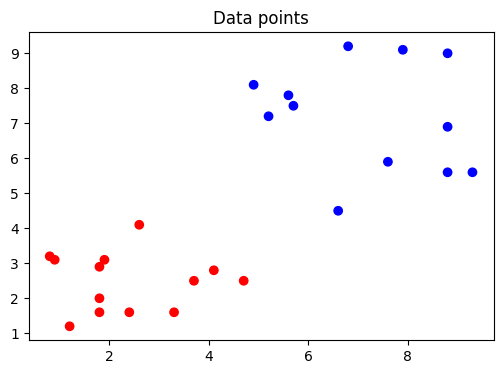

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset
x = np.array([[5.7, 7.5], [9.3, 5.6], [8.8, 6.9], [6.8, 9.2], [7.9, 9.1],
              [8.8, 5.6], [5.6, 7.8], [8.8, 9.0], [7.6, 5.9], [4.9, 8.1],
              [6.6, 4.5], [5.2, 7.2], [1.2, 1.2], [2.4, 1.6], [4.7, 2.5],
              [0.9, 3.1], [2.6, 4.1], [1.8, 2.0], [4.1, 2.8], [1.8, 1.6],
              [1.9, 3.1], [0.8, 3.2], [1.8, 2.9], [3.3, 1.6], [3.7, 2.5]
             ])

d = np.array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


plt.figure(figsize=(6,4))
plt.title("Data points")
plt.scatter(x[:, 0], x[:, 1], c = d, cmap = 'bwr')
plt.show()

In [42]:
#CRIANDO A CLASSE DA REDE ADALINE
class Adaline:
    
    def __init__(self, lr, e):
        '''Construtor, define taxa de aprendizado e a taxa de erro aceita para convergir'''
        self.lr = lr
        self.e = e
        
    def activation(self, value):
        ''' 1 se value >= 0, -1 senão'''
        return (1 if value >= 0 else -1)
        
    def predict(self, x):
        ''' Multiplicação matricial entre as entradas e os pesos somado ao bias proporcional'''
        return np.dot(x, self.weights.T) + self.bias * self.w_bias
    
    def evaluate(self, target, predicted):
        ''' Calcula a diferença entre o valor real e o valor predito'''
        return (target - predicted)
    
    def train(self, x, d):
        ''' Definir aleatoriamente os pesos, o bias e o peso do bias
            Enquanto a diferença entre m mse_anterior e o mse_atual for maior que 'e' continua o processo 
        '''
        self.weights = np.random.random(x.shape[1])
        self.bias = -1
        self.w_bias = np.random.random()
        
        epoch = 0
        self.total_mse = []
        last_mse = np.inf
        
        
        while True:
            mse = 0
            # Para cada amostra
            for xi, target in zip(x, d):
                
                predicted = self.predict(xi)  
                current_error = self.evaluate(target, predicted)
                mse += (current_error ** 2)
                self.weights += self.lr * current_error * xi
                self.w_bias += self.lr * current_error * self.bias
                
            mse = (mse/len(x))
            print(f"EPOCH: {epoch}\t- MSE: {mse}\t- MSE_ant - MSE: {abs(last_mse - mse)}")
            if abs(last_mse - mse) <= self.e:
                break
            
            self.total_mse.append(mse)
            last_mse = mse
            epoch +=1
            
    def test(self, x):
        ''' Dado uma lista de X, submete-os à rede'''
        results = []
        for xi in x:
            predict = self.predict(xi)
            predict = self.activation(predict)
            results.append(predict)
            
        return results

In [43]:
#Instanciando e treinando a rede
rede = Adaline(lr = 0.01, e = 1e-6)
rede.train(x = x, d = d)

EPOCH: 0	- MSE: 4.346615639168706	- MSE_ant - MSE: inf
EPOCH: 1	- MSE: 1.6655685152252957	- MSE_ant - MSE: 2.6810471239434106
EPOCH: 2	- MSE: 1.5801156464675312	- MSE_ant - MSE: 0.08545286875776448
EPOCH: 3	- MSE: 1.508209973272824	- MSE_ant - MSE: 0.0719056731947072
EPOCH: 4	- MSE: 1.4447502259658258	- MSE_ant - MSE: 0.06345974730699822
EPOCH: 5	- MSE: 1.3868457471665607	- MSE_ant - MSE: 0.05790447879926508
EPOCH: 6	- MSE: 1.332852155214283	- MSE_ant - MSE: 0.05399359195227782
EPOCH: 7	- MSE: 1.2818336128084789	- MSE_ant - MSE: 0.05101854240580406
EPOCH: 8	- MSE: 1.2332539459749605	- MSE_ant - MSE: 0.04857966683351833
EPOCH: 9	- MSE: 1.1868001227395286	- MSE_ant - MSE: 0.0464538232354319
EPOCH: 10	- MSE: 1.1422820555483553	- MSE_ant - MSE: 0.04451806719117335
EPOCH: 11	- MSE: 1.099576242253508	- MSE_ant - MSE: 0.04270581329484724
EPOCH: 12	- MSE: 1.0585944564568355	- MSE_ant - MSE: 0.040981785796672554
EPOCH: 13	- MSE: 1.0192666521174218	- MSE_ant - MSE: 0.03932780433941363
EPOCH: 14	

In [44]:
# Entrando com novos valores para teste
x_teste = np.array([[6, 2], [9, 3], [5, 6], [7, 3], [6, 7], [1, 6]])

teste_resultado = rede.test(x_teste)
teste_resultado

[1, -1, -1, 1, -1, 1]

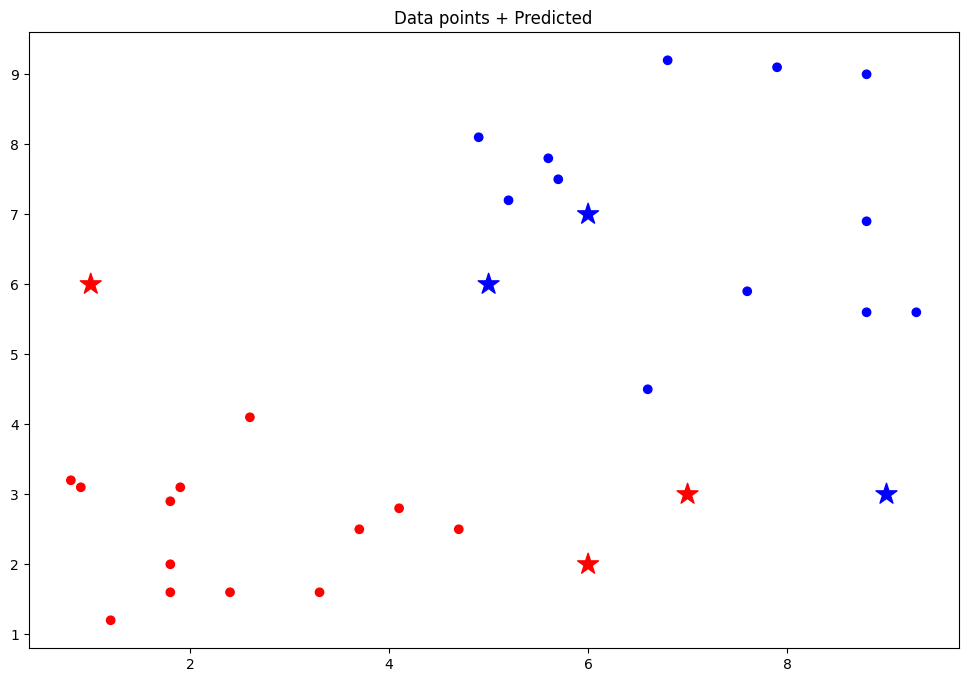

In [45]:
plt.figure(figsize=(12,8))
plt.title("Data points + Predicted")
plt.scatter(x[:, 0], x[:, 1], c = d, cmap = 'bwr')
plt.scatter(x_teste[:, 0], x_teste[:, 1], c = teste_resultado, cmap = 'bwr', marker = "*", s=250)
plt.show()

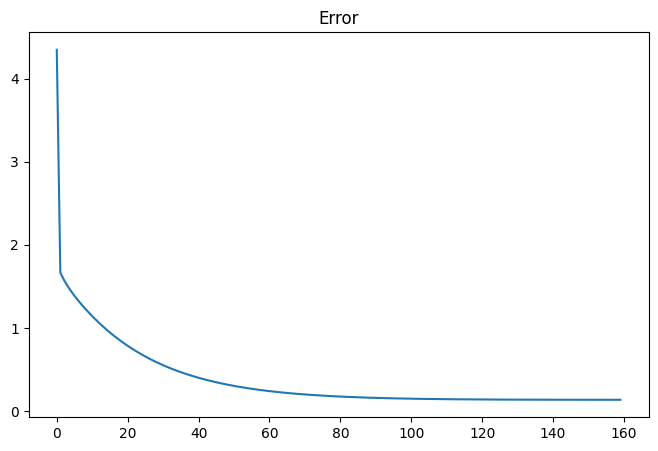

In [46]:
plt.figure(figsize=(8,5))
plt.title("Error")
plt.plot(rede.total_mse)
plt.show()